In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [84]:
wp_datapath = "../wepanic_collated_catalogue3.csv"
wp_data = pd.read_csv(wp_datapath)
VALID = wp_data[wp_data['GOOD'].isin([1,3])]
VALID = VALID[(VALID['HEART_RATE_BPM'] < 130) & VALID['GOOD'].isin([1,3])]

In [83]:
THEIRS = VALID[(VALID['SUBJECT'] < 100) & (VALID['GOOD'].isin([1,3]) )]
print(len(THEIRS))
OURS = VALID[(VALID['SUBJECT'] > 100) & (VALID['GOOD'] == 1)]
print(len(OURS))

33
38


In [13]:
good_samps_hr = THEIRS['HEART_RATE_BPM'].values.tolist()
good_samps_rr = THEIRS['RESP_RATE_BR_PM'].values.tolist()

our_records_hr = OURS['HEART_RATE_BPM'].values.tolist()
our_records_rr = OURS['RESP_RATE_BR_PM'].values.tolist()

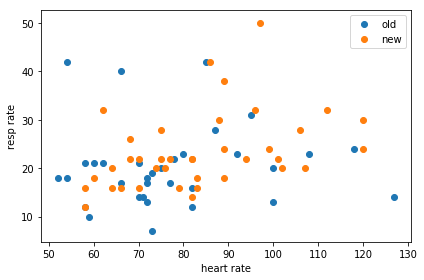

In [18]:
plt.scatter(good_samps_hr, good_samps_rr, label='old')
plt.scatter(our_records_hr, our_records_rr, label='new')
plt.xlabel("heart rate")
plt.ylabel('resp rate')
plt.legend()
plt.tight_layout()
plt.savefig('figs/oldnew_split.png')
plt.show()

In [67]:
import random

In [85]:
subjects = list(set(VALID.SUBJECT.values.tolist()))
test_subjects = random.sample(subjects, int(round(0.2*len(subjects))))
train_subjects = list(filter(lambda s: s not in test_subjects, subjects))
print(len(test_subjects), len(train_subjects))

TRAIN = VALID[VALID['SUBJECT'].isin(train_subjects)]
TEST  = VALID[VALID['SUBJECT'].isin(test_subjects)]

train_samps_hr = TRAIN['HEART_RATE_BPM'].values.tolist()
train_samps_rr = TRAIN['RESP_RATE_BR_PM'].values.tolist()

test_hr = TEST['HEART_RATE_BPM'].values.tolist()
test_rr = TEST['RESP_RATE_BR_PM'].values.tolist()

9 37


In [86]:
NEW_DISTRIB = pd.DataFrame(columns=wp_data.columns)
for i, (idx, row) in enumerate(wp_data.iterrows()):
    row = [row[col] for col in wp_data.columns]
    if row[0] in train_subjects:
        row[-1] = 1
    
    elif row[0] in test_subjects:
        row[-1] = 3
    
    NEW_DISTRIB.loc[i] = row
    
NEW_DISTRIB
NEW_DISTRIB.to_csv('WPCC_new-dist.csv',index=False)

In [87]:
NEW_DISTRIB

,SUBJECT,TRIAL,FRAME_PTH,HEART_RATE_BPM,RESP_RATE_BR_PM,GOOD
0,1.0,1,glued_32_32/S0001/Trial1_frames,64.0,34.0,0
1,1.0,2,glued_32_32/S0001/Trial2_frames,88.0,48.0,0
2,2.0,1,glued_32_32/S0002/Trial1_frames,100.0,20.0,1
3,2.0,2,glued_32_32/S0002/Trial2_frames,128.0,26.0,1
4,3.0,1,glued_32_32/S0003/Trial1_frames,60.0,20.0,0
5,3.0,2,glued_32_32/S0003/Trial2_frames,90.0,24.0,0
6,4.0,1,glued_32_32/S0004/Trial1_frames,56.0,10.0,0
7,4.0,2,glued_32_32/S0004/Trial2_frames,72.0,18.0,0
8,5.0,1,glued_32_32/S0005/Trial1_frames,70.0,16.0,0
9,5.0,2,glued_32_32/S0005/Trial2_frames,76.0,24.0,0


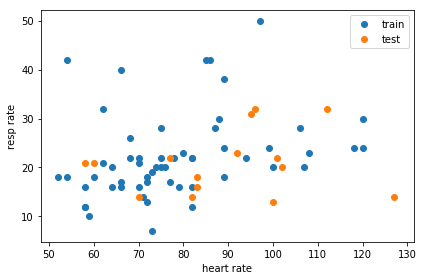

In [88]:
plt.scatter(train_samps_hr, train_samps_rr, label='train')
plt.scatter(test_hr, test_rr, label='test')
plt.xlabel("heart rate")
plt.ylabel('resp rate')
plt.legend()
plt.tight_layout()
plt.savefig('figs/test_traintestsplit.png')
plt.show()

r_value 0.40719


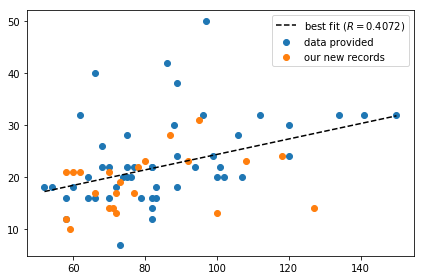

In [14]:
total_hr = our_records_hr + good_samps_hr
total_rr = our_records_rr + good_samps_rr
#print(len(total_hr), len(our_records_hr))
slope, intercept, r_value, p_value, std_err = linregress(total_hr, total_rr)

def linear_fit(Xs):
    return slope*np.array(Xs) + intercept

print('r_value {:0.5f}'.format(r_value))

plt.scatter(good_samps_hr, good_samps_rr, label='data provided')
plt.scatter(our_records_hr, our_records_rr, label='our new records')
Xdata = np.linspace(min(total_hr), max(total_hr), 100)
plt.plot(Xdata,linear_fit(Xdata), label=r'best fit $(R={:0.4f})$'.format(r_value),linestyle='--',color='black')
plt.legend()
plt.tight_layout()
plt.savefig('figs/new_records_withfit.png')
plt.show()

In [8]:
VALID

,SUBJECT,TRIAL,FRAME_PTH,HEART_RATE_BPM,RESP_RATE_BR_PM,GOOD
2,2.0,1,glued_32_32/S0002/Trial1_frames,100.0,20.0,1
10,6.0,1,glued_32_32/S0006/Trial1_frames,73.0,7.0,1
24,13.0,1,glued_32_32/S0013/Trial1_frames,82.0,12.0,1
25,13.0,2,glued_32_32/S0013/Trial2_frames,82.0,16.0,1
48,25.0,1,glued_32_32/S0025/Trial1_frames,75.0,20.0,1
60,31.0,1,glued_32_32/S0031/Trial1_frames,54.0,18.0,1
74,38.0,1,glued_32_32/S0038/Trial1_frames,52.0,18.0,1
75,38.0,2,glued_32_32/S0038/Trial2_frames,66.0,40.0,1
76,39.0,1,glued_32_32/S0039/Trial1_frames,72.0,18.0,1
94,48.0,1,glued_32_32/S0048/Trial1_frames,54.0,42.0,1


,SUBJECT,TRIAL,FRAME_PTH,HEART_RATE_BPM,RESP_RATE_BR_PM,GOOD
2,2.0,1,glued_32_32/S0002/Trial1_frames,100.0,20.0,1
10,6.0,1,glued_32_32/S0006/Trial1_frames,73.0,7.0,1
24,13.0,1,glued_32_32/S0013/Trial1_frames,82.0,12.0,1
25,13.0,2,glued_32_32/S0013/Trial2_frames,82.0,16.0,1
48,25.0,1,glued_32_32/S0025/Trial1_frames,75.0,20.0,1
60,31.0,1,glued_32_32/S0031/Trial1_frames,54.0,18.0,1
74,38.0,1,glued_32_32/S0038/Trial1_frames,52.0,18.0,1
75,38.0,2,glued_32_32/S0038/Trial2_frames,66.0,40.0,1
76,39.0,1,glued_32_32/S0039/Trial1_frames,72.0,18.0,1
94,48.0,1,glued_32_32/S0048/Trial1_frames,54.0,42.0,1
